# MinTEs

## Setup
This notebook is meant to be executed in Google Colab. [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AleVin1995/MinTEs/blob/master/notebooks/Summary_Colab.ipynb)
The lines in the first 2 cells should be uncommented and executed when running this notebook for the first time.

Installation of Miniconda3 and MinTEs GitHub repo

In [ ]:
# %env PYTHONPATH=
# !wget -c https://repo.anaconda.com/miniconda/Miniconda3-py39_4.9.2-Linux-x86_64.sh
# !chmod +x Miniconda3-py39_4.9.2-Linux-x86_64.sh
# !bash ./Miniconda3-py39_4.9.2-Linux-x86_64.sh -b -f -p /content/miniconda3
#
# import os
# os.system('git clone https://github.com/AleVin1995/MinTEs.git')

Setting environment and file paths

In [ ]:
import os
path_env = '/content/miniconda3/bin:' + os.environ['PATH']
%env PATH=$path_env
# !conda env create -f MinTEs/envs/MinTEs_Colab.yaml
# os.chdir('MinTEs')
# path = os.getcwd()

Import packages

In [15]:
!source activate MinTEs && conda env list

import copy
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import warnings

## MinTEs hyperparameters optimisation

Testing of substitution rate (SR) hyperparemeter:

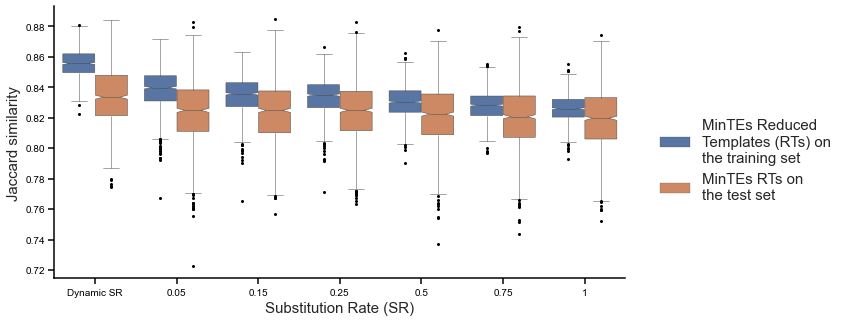

In [12]:
warnings.filterwarnings('ignore')

df1 = pd.read_csv(path + '/results/hyperparameters/MinTEs_hyperparameter_SR.tsv', sep='\t')
df2 = pd.read_csv(path + '/results/hyperparameters/MinTEs_hyperparameter_C.tsv', sep='\t')

flierprops = dict(marker='o', markerfacecolor='black', markersize=2,  markeredgecolor='black')

sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
    'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df1, gridspec_kws={"wspace":0.2, "hspace":0.4},
    height = 5, aspect = 2, margin_titles=True, sharey=False, sharex=False)
g = g.map(sns.boxplot, 'sub_rate', 'value', 'set', palette = 'deep', notch=True, flierprops=flierprops, linewidth=0.5)
g.axes[0,0].set_ylabel('Jaccard similarity',size=15)
g.axes[0,0].set_xlabel('Substitution Rate (SR)',size=15)
g.add_legend(fontsize=15, markerscale=2)

for ax in g.axes.flat:
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

Testing of C hyperparameter, defined as the number of iterations without improvement:

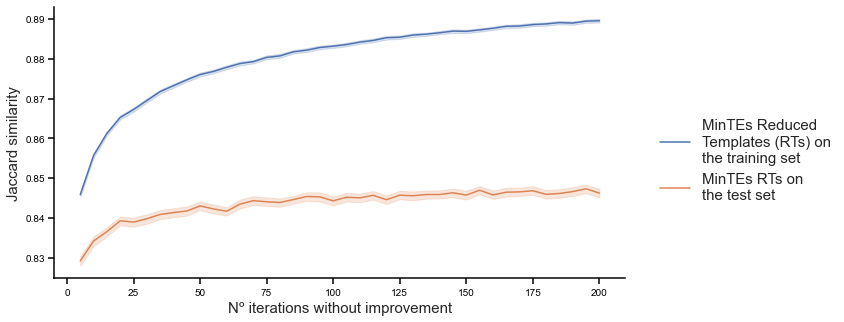

In [23]:
sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
        'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df2, gridspec_kws={"wspace":0.2, "hspace":0.4},
    height = 5, aspect = 2, margin_titles=True, sharey=False, sharex=False)
g = g.map(sns.lineplot, 'step', 'value', 'set', palette = 'deep', 
    hue_order = ['MinTEs Reduced\nTemplates (RTs) on\nthe training set', 'MinTEs RTs on\nthe test set'])
g.axes[0,0].set_ylabel('Jaccard similarity',size=15)
g.axes[0,0].set_xlabel('Nº iterations without improvement',size=15)
g.add_legend(fontsize=15, markerscale=2)

for ax in g.axes.flat:
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

## Performance assessment of library-specific reduced templates

Performances of MinTEs reduced templates using BAGEL:

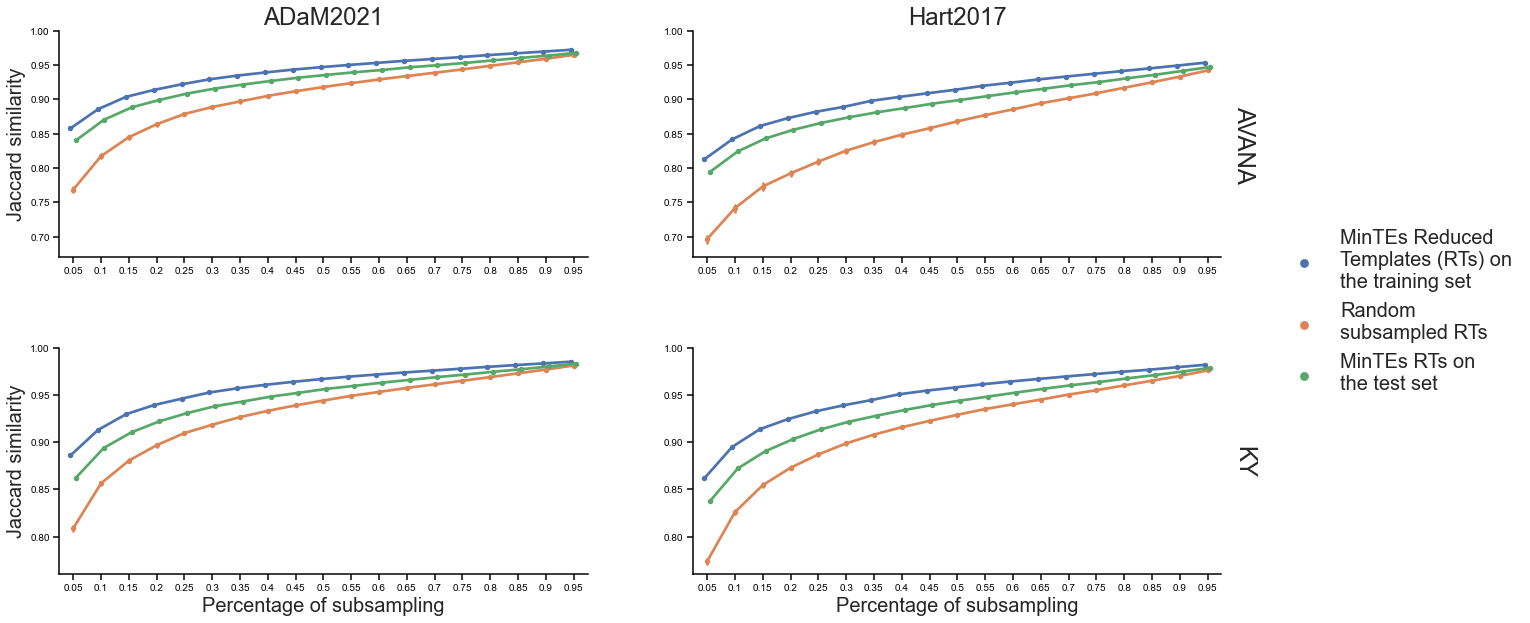

In [49]:
warnings.filterwarnings('ignore')

df1 = pd.read_csv(path + '/results/library-specific_RTs/MinTEs_selection.tsv', sep='\t')
df2 = pd.read_csv(path + '/results/library-specific_RTs/RTs_BAGEL_rnd.tsv', sep='\t')
df3 = pd.read_csv(path + '/results/library-specific_RTs/RTs_BAGEL_dd.tsv', sep='\t')

idx = np.unique(np.array(df1['perc']))
idx = idx.tolist()

sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
    'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df1, row = 'source', col = 'gset', gridspec_kws={"wspace":0.2, "hspace":0.4},
    height = 5, aspect = 2, margin_titles=True, sharey=False)
g.map(sns.pointplot, 'perc', 'value', 'type', order = idx,\
    hue_order = ['MinTEs Reduced\nTemplates (RTs) on\nthe training set', 'Random\nsubsampled RTs', 'MinTEs RTs on\nthe test set'], palette = 'deep',\
    seed = 1234, markers=['.','.','.'], dodge=0.2)
g.add_legend(fontsize=20, markerscale=2)
g.axes[0,0].set_ylabel('Jaccard similarity',size=20)
g.axes[0,0].set_ylim(0.67,1)
g.axes[0,1].set_ylim(0.67,1)
g.axes[1,0].set_ylim(0.76,1)
g.axes[1,0].set_ylabel('Jaccard similarity',size=20)
g.axes[1,0].set_xlabel('Percentage of subsampling',size=20)
g.axes[1,1].set_ylim(0.76,1)
g.axes[1,1].set_xlabel('Percentage of subsampling',size=20)
g.set_titles(col_template="{col_name}", row_template="{row_name}",size=24)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

Performances of MinTEs library-specific vs DepMap-data-driven reduced templates using BAGEL:

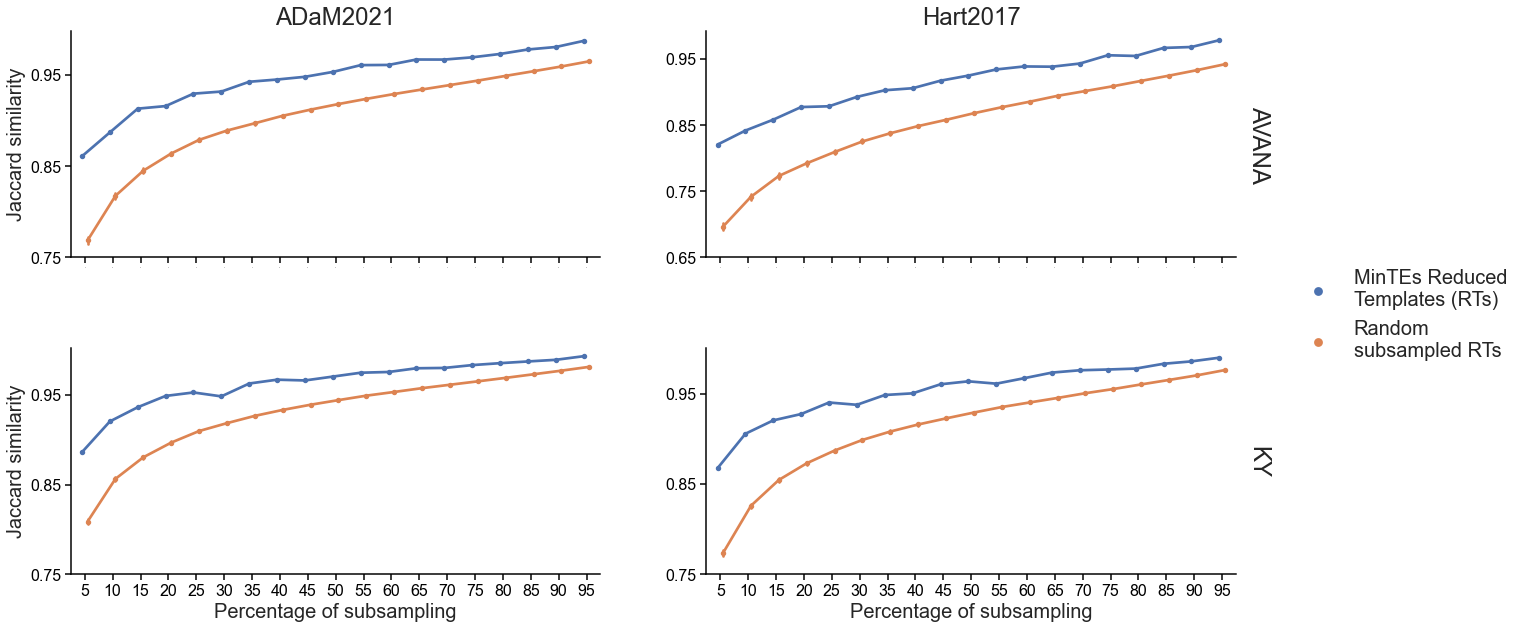

In [20]:
sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
        'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df2, row = 'source', col = 'gset', gridspec_kws={"wspace":0.2, "hspace":0.4},
    height = 5, aspect = 2, margin_titles=True, sharey=False, sharex=False)
g = g.map(sns.pointplot, 'perc', 'value', 'type', palette = 'deep',\
    hue_order = ['MinTEs Reduced\nTemplates (RTs)', 'Random\nsubsampled RTs'], seed = 1234, markers=['.','.'], dodge=0.2)
g.add_legend(fontsize=20, markerscale=2)
g.axes[0,0].set_ylabel('Jaccard similarity',size=20)
g.axes[1,0].set_ylabel('Jaccard similarity',size=20)
g.axes[1,0].set_xlabel('Percentage of subsampling',size=20)
g.axes[1,1].set_xlabel('Percentage of subsampling',size=20)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

for i in range(2):
    for j in range(2):
        y_axis = g.axes[i,j].get_yticks()
        y_init = np.round(np.floor(y_axis[0]/0.05)*0.05, decimals=2)
        y_dist = np.arange(y_init, 1, 0.1)
        y_axis = np.round(y_dist, decimals=2)

        g.axes[i,j].set_yticks(y_axis)
        g.axes[i,j].set_yticklabels(y_axis, size = 16)

        x_axis = (g.axes[i,j].get_xticks()+1)*5

        if i == 1:
            g.axes[i,j].set_xticklabels(x_axis, size = 16)
        else:
            g.axes[i,j].set_xticklabels(x_axis, size = 0)

g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)

Performances of MinTEs library-specific vs DepMap-data-driven reduced templates using BAGEL:

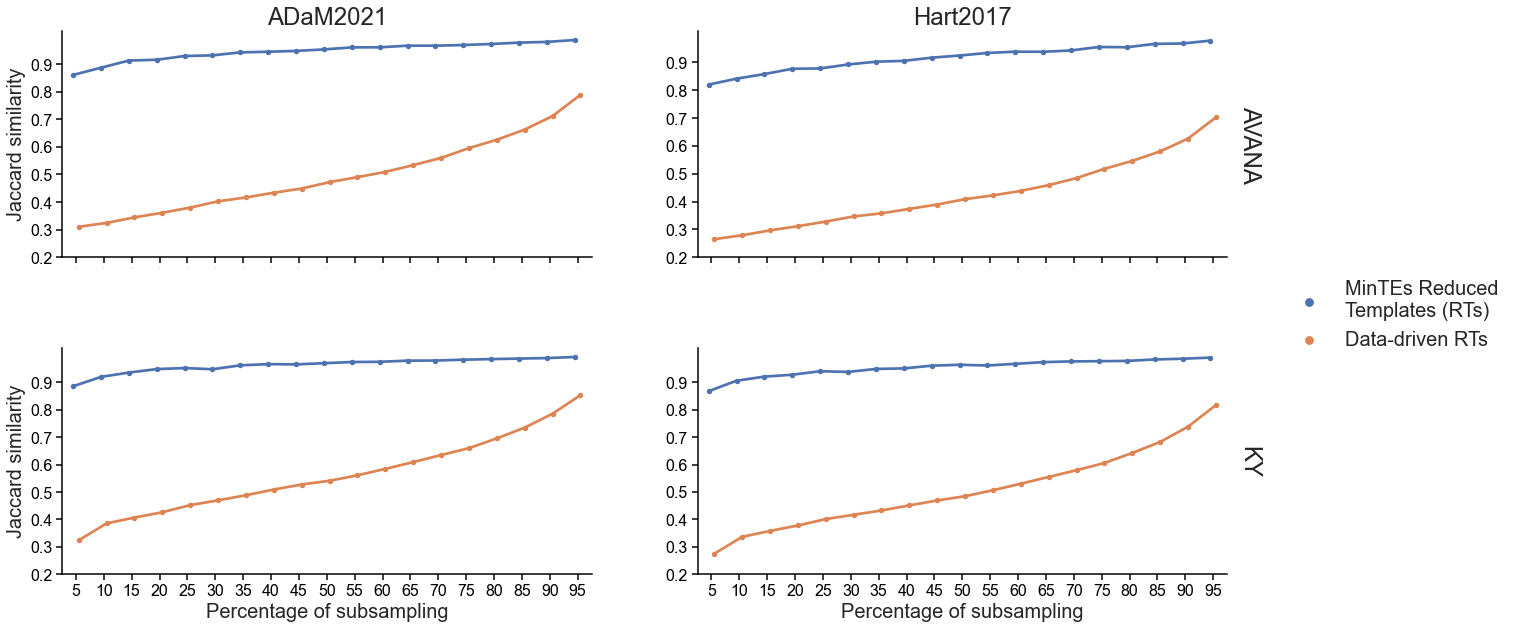

In [21]:
sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
        'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df3, row = 'source', col = 'gset', gridspec_kws={"wspace":0.2, "hspace":0.4},
    height = 5, aspect = 2, margin_titles=True, sharey=False, sharex=False)
g = g.map(sns.pointplot, 'perc', 'value', 'type', palette = 'deep',\
    hue_order = ['MinTEs Reduced\nTemplates (RTs)', 'Data-driven RTs'], seed = 1234, markers=['.','.'], dodge=0.2)
g.add_legend(fontsize=20, markerscale=2)
g.axes[0,0].set_ylabel('Jaccard similarity',size=20)
g.axes[1,0].set_ylabel('Jaccard similarity',size=20)
g.axes[1,0].set_xlabel('Percentage of subsampling',size=20)
g.axes[1,1].set_xlabel('Percentage of subsampling',size=20)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

for i in range(2):
    for j in range(2):
        y_axis = g.axes[i,j].get_yticks()
        y_init = np.round(np.floor(y_axis[0]/0.05)*0.05, decimals=2)
        y_dist = np.arange(y_init, 1, 0.1)
        y_axis = np.round(y_dist, decimals=2)

        g.axes[i,j].set_yticks(y_axis)
        g.axes[i,j].set_yticklabels(y_axis, size = 16)

        x_axis = (g.axes[i,j].get_xticks()+1)*5

        if i == 1:
            g.axes[i,j].set_xticklabels(x_axis, size = 16)
        else:
            g.axes[i,j].set_xticklabels(x_axis, size = 0)

g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)

## Zoom in on 5% library-independent reduced templates performances

Validation of the MinTEs 5% library-independent reduced template (RT) on independent datasets (BAGEL):

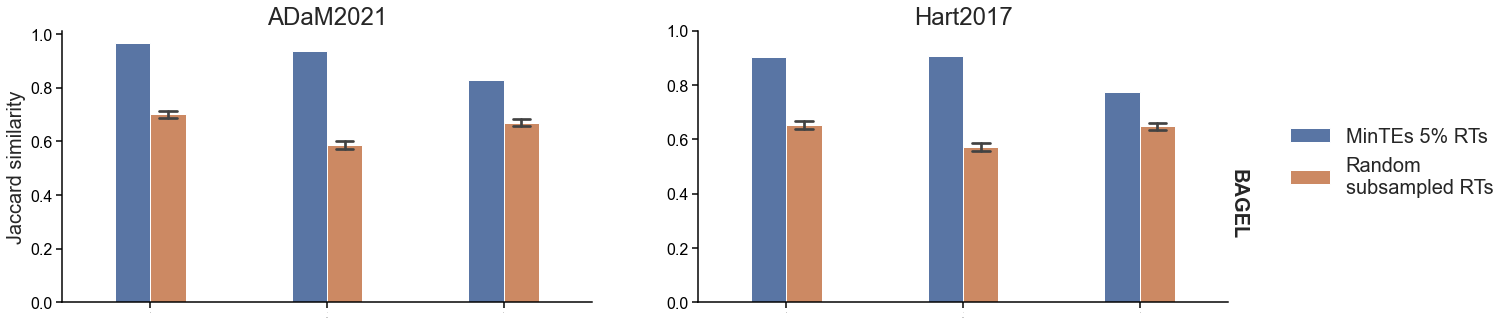

In [16]:
warnings.filterwarnings('ignore')

df1 = pd.read_csv(path + '/results/library-independent_RTs/gene_essentiality_estimation/5%_RTs_BAGEL_rnd.tsv', sep='\t')
df2 = pd.read_csv(path + '/results/library-independent_RTs/gene_essentiality_estimation/5%_RTs_FDR_rnd.tsv', sep='\t')
df3 = pd.read_csv(path + '/results/library-independent_RTs/gene_essentiality_estimation/Common_vs_exclusive.tsv', sep='\t')

sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
        'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df1, col = 'gset', gridspec_kws={"wspace":0.2, "hspace":0.4},
    height = 5, aspect = 2, margin_titles=True, sharey=False, sharex=False)
g = g.map(sns.barplot, 'source', 'value', 'type', palette = 'deep', hue_order = ['MinTEs 5% RTs', 'Random\nsubsampled RTs'], capsize=0.1)
g.add_legend(fontsize=20)
g.axes[0,0].set_ylabel('Jaccard similarity', size=20)
g.axes[0,0].set_xlabel('Library', size=0)
g.axes[0,1].set_xlabel('Library', size=0)
g.axes[0,1].text(2.5, 0.25, 'BAGEL', weight = 'bold', fontsize=20, rotation=270)
g.set_titles(col_template="{col_name}", row_template="{row_name}")

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    c=0

    for bar, newwidth in zip(ax.patches, np.array([0.2]*6)):
        x = bar.get_x()

        if c < 3:
            centre = x+newwidth/2
            bar.set_x(centre+newwidth/2)
        else:
            centre = x-newwidth/2
            bar.set_x(centre+newwidth/2)

        c+=1
        bar.set_width(newwidth)

    for err in ax.lines:
        xpos = err.get_xdata()
        xpos = xpos-newwidth/2
        err.set_xdata(xpos)

for j in range(2):
    y_axis = g.axes[0,j].get_yticks()
    y_dist = np.arange(0, 1.1, 0.2)
    y_axis = np.round(y_dist, decimals=2)

    g.axes[0,j].set_yticks(y_axis)
    g.axes[0,j].set_yticklabels(y_axis, size = 16)

    x_axis = g.axes[0,j].get_xticks()
    g.axes[0,j].set_xticklabels(x_axis, size = 0)

Validation of the MinTEs 5% library-independent RT on independent datasets (FDR method):

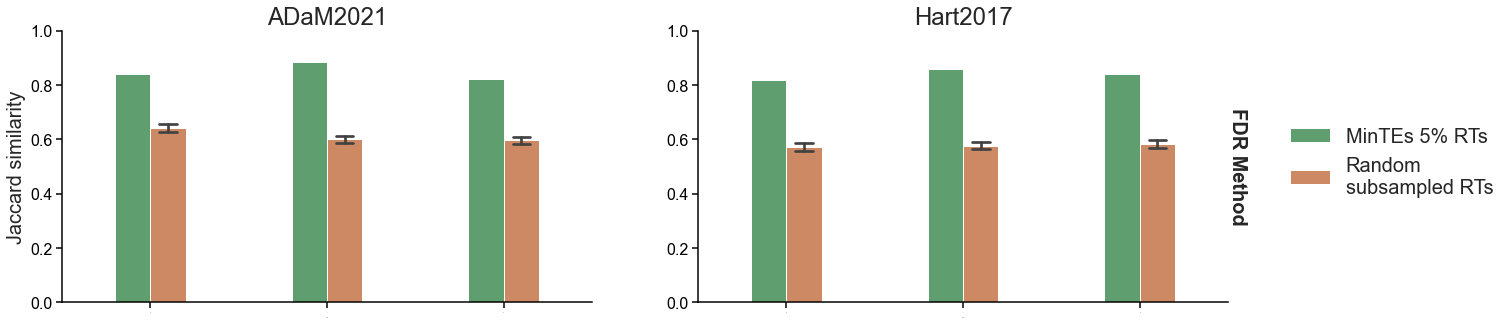

In [17]:
sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
        'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df2, col = 'gset', gridspec_kws={"wspace":0.2, "hspace":0.4},
    height = 5, aspect = 2, margin_titles=True, sharey=False, sharex=False)
g = g.map(sns.barplot, 'source', 'value', 'type', palette = [sns.color_palette('deep')[2], sns.color_palette('deep')[1]], hue_order = ['MinTEs 5% RTs', 'Random\nsubsampled RTs'], capsize=0.1)
g.add_legend(fontsize=20)
g.axes[0,0].set_ylabel('Jaccard similarity', size=20)
g.axes[0,0].set_xlabel('Library', size=0)
g.axes[0,1].set_xlabel('Library', size=0)
g.axes[0,1].text(2.5, 0.3, 'FDR Method', weight = 'bold', fontsize=20, rotation=270)
g.set_titles(col_template="{col_name}", row_template="{row_name}")

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    c=0

    for bar, newwidth in zip(ax.patches, np.array([0.2]*6)):
        x = bar.get_x()

        if c < 3:
            centre = x+newwidth/2
            bar.set_x(centre+newwidth/2)
        else:
            centre = x-newwidth/2
            bar.set_x(centre+newwidth/2)

        c+=1
        bar.set_width(newwidth)

    for err in ax.lines:
        xpos = err.get_xdata()
        xpos = xpos-newwidth/2
        err.set_xdata(xpos)

for j in range(2):
    y_axis = g.axes[0,j].get_yticks()
    y_dist = np.arange(0, 1.1, 0.2)
    y_axis = np.round(y_dist, decimals=2)

    g.axes[0,j].set_yticks(y_axis)
    g.axes[0,j].set_yticklabels(y_axis, size = 16)

    x_axis = g.axes[0,j].get_xticks()
    g.axes[0,j].set_xticklabels(x_axis, size = 0)

Gene depletion fold-changes (post-correction for copy-number-bias) for genes that are commonly predicted as fitness by BAGEL when using as template classifier the MinTEs 5% library-independent RTs or the original reference gene-set of derivation, and for genes that are exclusive to one of the two predicted sets:

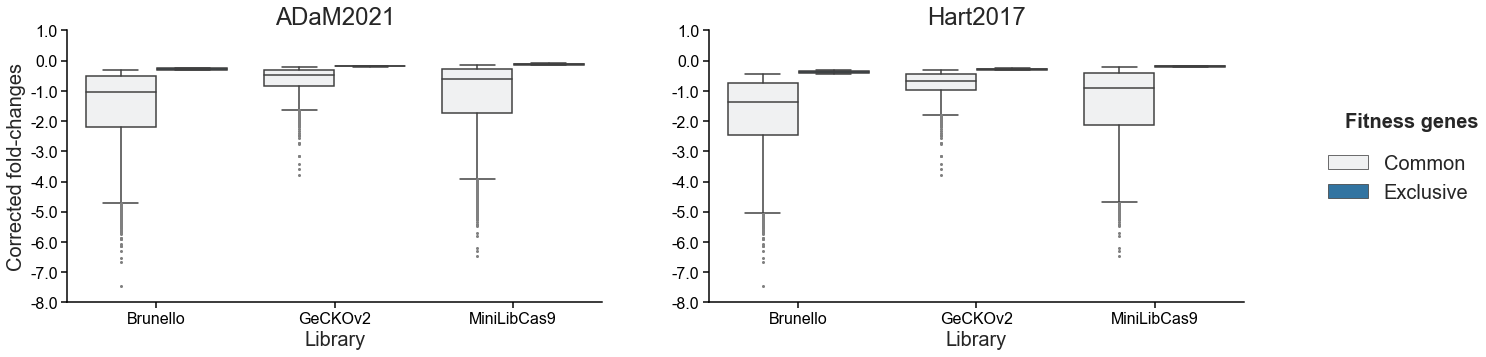

In [18]:
flierprops = dict(marker='o', markerfacecolor='grey', markersize=2,  markeredgecolor='grey')

sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
    'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df3, col = 'gset', gridspec_kws={"wspace":0.2, "hspace":0.4},
        height = 5, aspect = 2, margin_titles=True, sharey=False)
g.map(sns.boxplot, 'Library', 'Corrected fold-changes', 'category', hue = 'category', flierprops=flierprops)
g.axes[0,0].set_ylabel('Corrected fold-changes', size=20)
g.axes[0,0].set_xlabel('Library', size=20)
g.axes[0,1].set_xlabel('Library', size=20)
g.axes[0,1].text(3.07, -2.2, 'Fitness genes', weight = 'bold', fontsize=20)
g.set_titles(col_template="{col_name}")
g.add_legend(fontsize=20)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

for j in range(2):
    y_axis = g.axes[0,j].get_yticks()
    y_axis = np.round(y_axis, decimals=2)

    g.axes[0,j].set_yticks(y_axis)
    g.axes[0,j].set_yticklabels(y_axis, size = 16)

    x_axis = np.array(['Brunello', 'GeCKOv2', 'MiniLibCas9'])
    g.axes[0,j].set_xticklabels(x_axis, size = 16)

## Performance assessment of library-independent reduced templates

Performances of MinTEs library-independent vs random reduced templates using BAGEL:

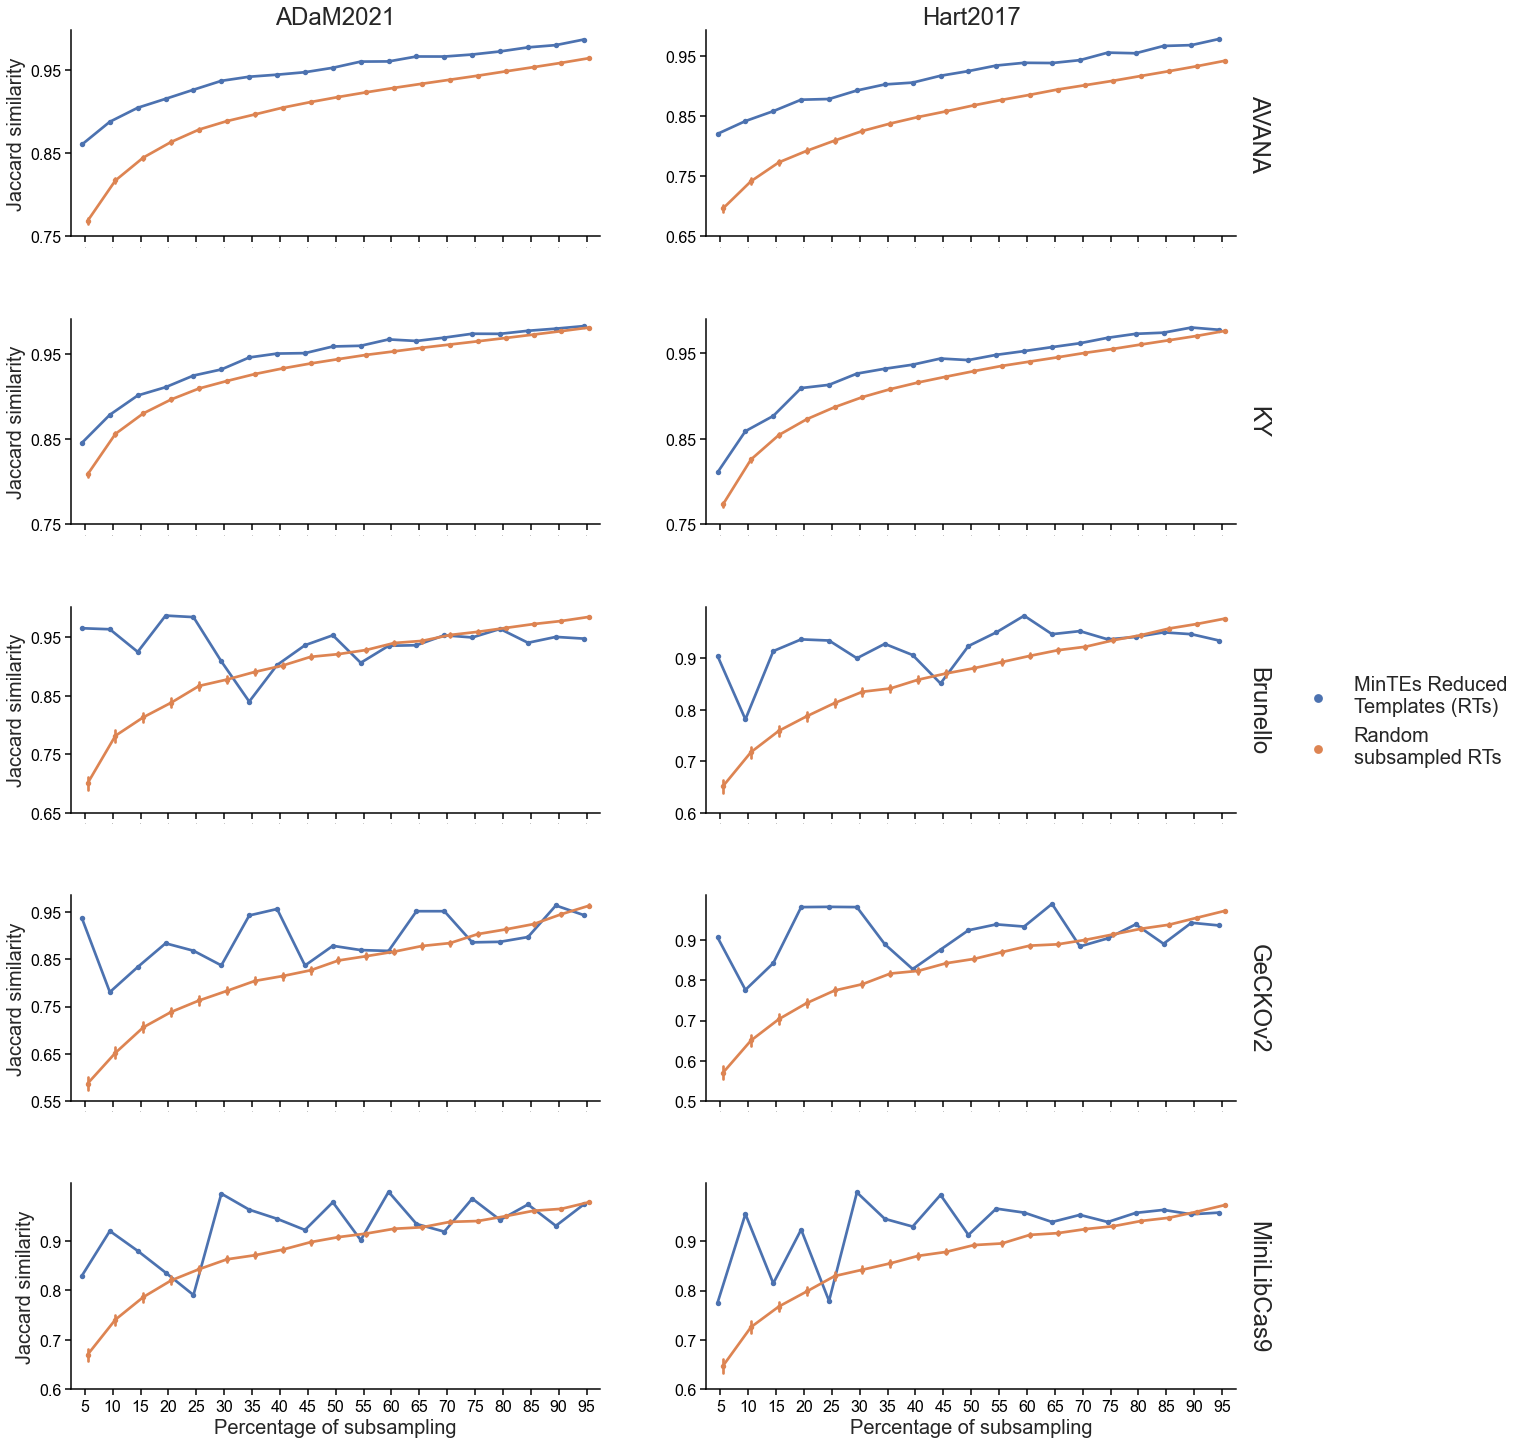

In [51]:
warnings.filterwarnings('ignore')

df1 = pd.read_csv(path + '/results/library-independent_RTs/gene_essentiality_estimation/RTs_BAGEL_rnd.tsv', sep='\t')
df2 = pd.read_csv(path + '/results/library-independent_RTs/gene_essentiality_estimation/RTs_BAGEL_dd.tsv', sep='\t')
df3 = pd.read_csv(path + '/results/library-independent_RTs/gene_essentiality_estimation/RTs_FDR_rnd.tsv', sep='\t')
df4 = pd.read_csv(path + '/results/library-independent_RTs/gene_essentiality_estimation/RTs_FDR_dd.tsv', sep='\t')

sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
        'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df1, row = 'source', col = 'gset', gridspec_kws={"wspace":0.2, "hspace":0.4},
    height = 5, aspect = 2, margin_titles=True, sharey=False, sharex=False)
g = g.map(sns.pointplot, 'perc', 'value', 'type', palette = 'deep',\
    hue_order = ['MinTEs Reduced\nTemplates (RTs)', 'Random\nsubsampled RTs'], seed = 1234, markers=['.','.'], dodge=0.2)
g.add_legend(fontsize=20, markerscale=2)

for i in range(5):
    g.axes[i,0].set_ylabel('Jaccard similarity',size=20)

g.axes[4,0].set_xlabel('Percentage of subsampling',size=20)
g.axes[4,1].set_xlabel('Percentage of subsampling',size=20)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

for i in range(5):
    for j in range(2):
        y_axis = g.axes[i,j].get_yticks()
        y_init = np.round(np.floor(y_axis[0]/0.05)*0.05, decimals=2)
        y_dist = np.arange(y_init, 1, 0.1)
        y_axis = np.round(y_dist, decimals=2)

        g.axes[i,j].set_yticks(y_axis)
        g.axes[i,j].set_yticklabels(y_axis, size = 16)

        x_axis = (g.axes[i,j].get_xticks()+1)*5

        if i == 4:
            g.axes[i,j].set_xticklabels(x_axis, size = 16)
        else:
            g.axes[i,j].set_xticklabels(x_axis, size = 0)

g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)

Performances of MinTEs library-independent vs DepMap-data-driven reduced templates using BAGEL:

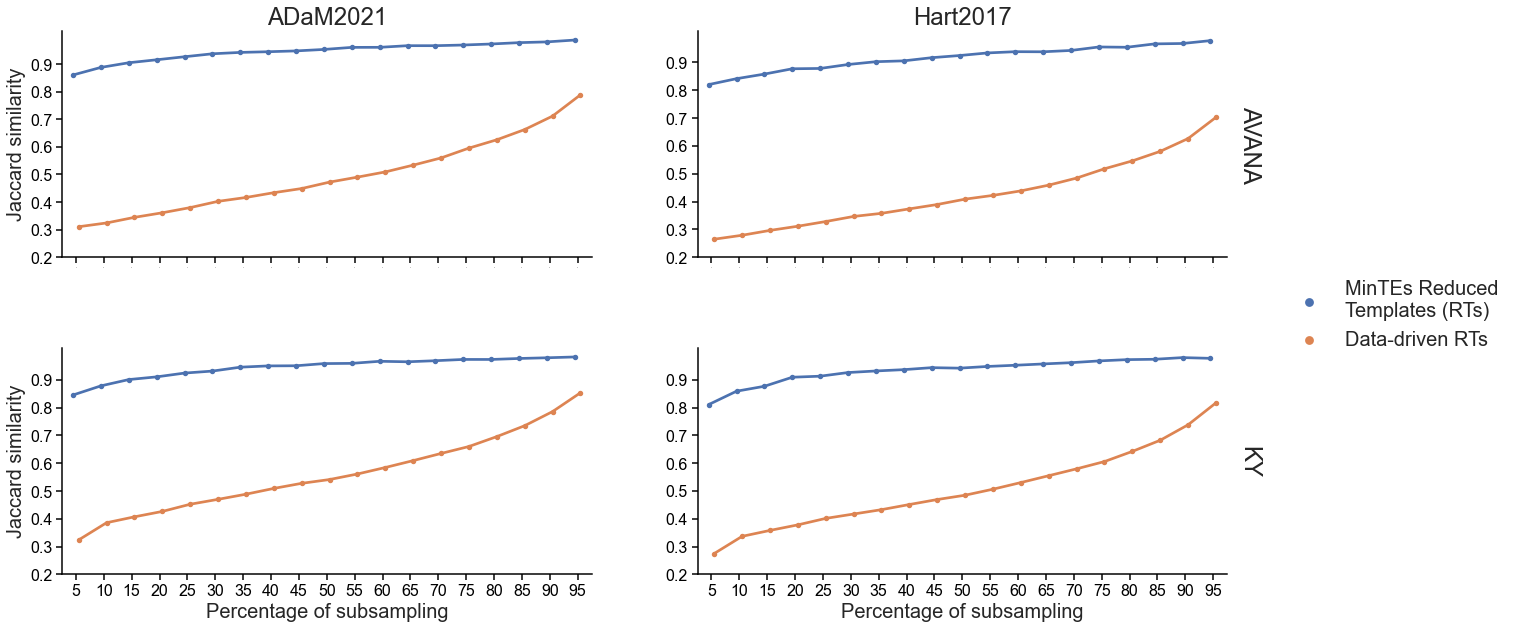

In [13]:
sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
        'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df2, row = 'source', col = 'gset', gridspec_kws={"wspace":0.2, "hspace":0.4},
    height = 5, aspect = 2, margin_titles=True, sharey=False, sharex=False)
g = g.map(sns.pointplot, 'perc', 'value', 'type', palette = 'deep',\
    hue_order = ['MinTEs Reduced\nTemplates (RTs)', 'Data-driven RTs'], seed = 1234, markers=['.','.'], dodge=0.2)
g.add_legend(fontsize=20, markerscale=2)
g.axes[0,0].set_ylabel('Jaccard similarity',size=20)
g.axes[1,0].set_ylabel('Jaccard similarity',size=20)
g.axes[1,0].set_xlabel('Percentage of subsampling',size=20)
g.axes[1,1].set_xlabel('Percentage of subsampling',size=20)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

for i in range(2):
    for j in range(2):
        y_axis = g.axes[i,j].get_yticks()
        y_init = np.round(np.floor(y_axis[0]/0.05)*0.05, decimals=2)
        y_dist = np.arange(y_init, 1, 0.1)
        y_axis = np.round(y_dist, decimals=2)

        g.axes[i,j].set_yticks(y_axis)
        g.axes[i,j].set_yticklabels(y_axis, size = 16)

        x_axis = (g.axes[i,j].get_xticks()+1)*5

        if i == 1:
            g.axes[i,j].set_xticklabels(x_axis, size = 16)
        else:
            g.axes[i,j].set_xticklabels(x_axis, size = 0)

g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)

Performances of MinTEs library-independent vs random reduced templates using the False Discovery Rate method:

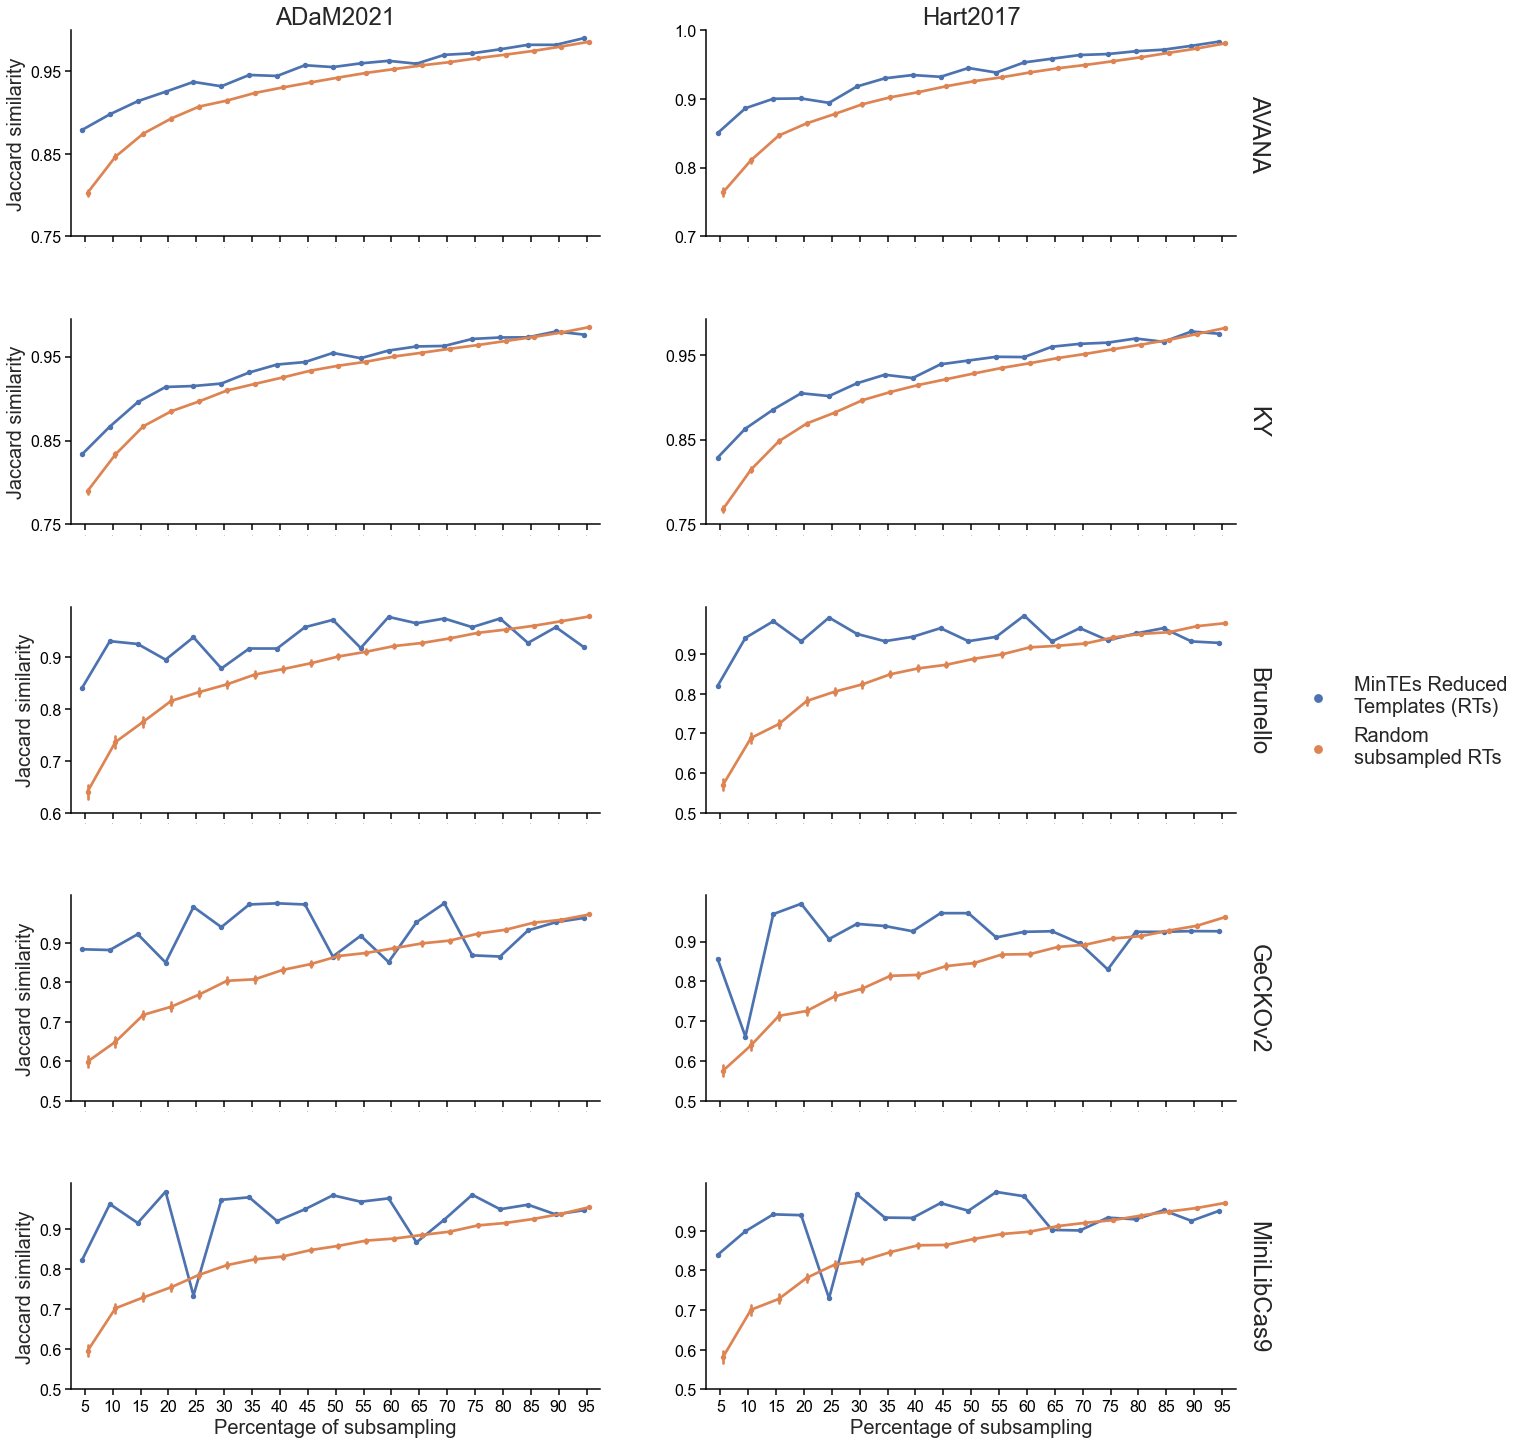

In [14]:
sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
        'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df3, row = 'source', col = 'gset', gridspec_kws={"wspace":0.2, "hspace":0.4},
    height = 5, aspect = 2, margin_titles=True, sharey=False, sharex=False)
g = g.map(sns.pointplot, 'perc', 'value', 'type', palette = 'deep',\
    hue_order = ['MinTEs Reduced\nTemplates (RTs)', 'Random\nsubsampled RTs'], seed = 1234, markers=['.','.'], dodge=0.2)
g.add_legend(fontsize=20, markerscale=2)

for i in range(5):
    g.axes[i,0].set_ylabel('Jaccard similarity',size=20)

g.axes[4,0].set_xlabel('Percentage of subsampling',size=20)
g.axes[4,1].set_xlabel('Percentage of subsampling',size=20)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

for i in range(5):
    for j in range(2):
        y_axis = g.axes[i,j].get_yticks()
        y_init = np.round(np.floor(y_axis[0]/0.05)*0.05, decimals=2)
        y_dist = np.arange(y_init, 1, 0.1)
        y_axis = np.round(y_dist, decimals=2)

        g.axes[i,j].set_yticks(y_axis)
        g.axes[i,j].set_yticklabels(y_axis, size = 16)

        x_axis = (g.axes[i,j].get_xticks()+1)*5

        if i == 4:
            g.axes[i,j].set_xticklabels(x_axis, size = 16)
        else:
            g.axes[i,j].set_xticklabels(x_axis, size = 0)

g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)

Performances of MinTEs library-independent vs DepMap-data-driven reduced templates using the False Discovery Rate method:

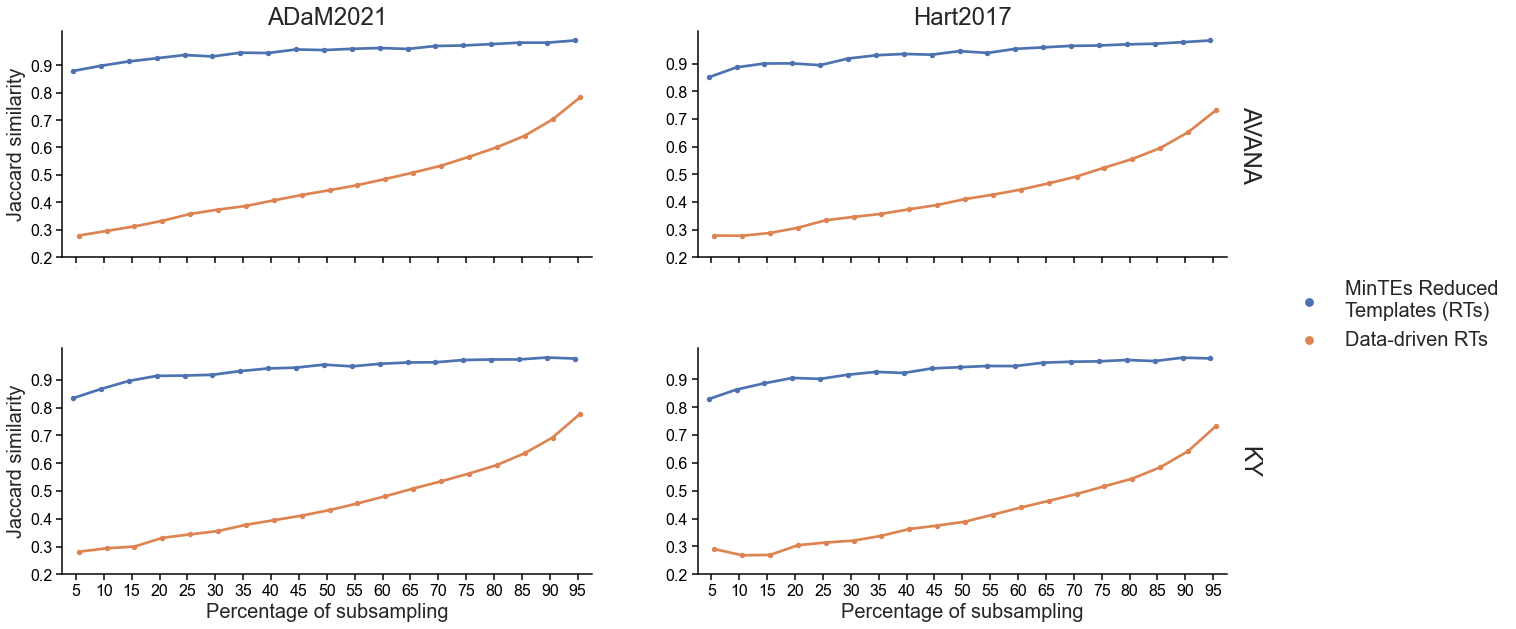

In [15]:
sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
        'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df4, row = 'source', col = 'gset', gridspec_kws={"wspace":0.2, "hspace":0.4},
    height = 5, aspect = 2, margin_titles=True, sharey=False, sharex=False)
g = g.map(sns.pointplot, 'perc', 'value', 'type', palette = 'deep',\
    hue_order = ['MinTEs Reduced\nTemplates (RTs)', 'Data-driven RTs'], seed = 1234, markers=['.','.'], dodge=0.2)
g.add_legend(fontsize=20, markerscale=2)
g.axes[0,0].set_ylabel('Jaccard similarity',size=20)
g.axes[1,0].set_ylabel('Jaccard similarity',size=20)
g.axes[1,0].set_xlabel('Percentage of subsampling',size=20)
g.axes[1,1].set_xlabel('Percentage of subsampling',size=20)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

for i in range(2):
    for j in range(2):
        y_axis = g.axes[i,j].get_yticks()
        y_init = np.round(np.floor(y_axis[0]/0.05)*0.05, decimals=2)
        y_dist = np.arange(y_init, 1, 0.1)
        y_axis = np.round(y_dist, decimals=2)

        g.axes[i,j].set_yticks(y_axis)
        g.axes[i,j].set_yticklabels(y_axis, size = 16)

        x_axis = (g.axes[i,j].get_xticks()+1)*5

        if i == 1:
            g.axes[i,j].set_xticklabels(x_axis, size = 16)
        else:
            g.axes[i,j].set_xticklabels(x_axis, size = 0)

g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)

## Quality control assessment

Cohen's d scores computed on the DEMETER dataset using the whole reference gene-sets (x-axis) or the MinTEs 5% RTs (y-axis), with Pearson’s correlation coefficients:

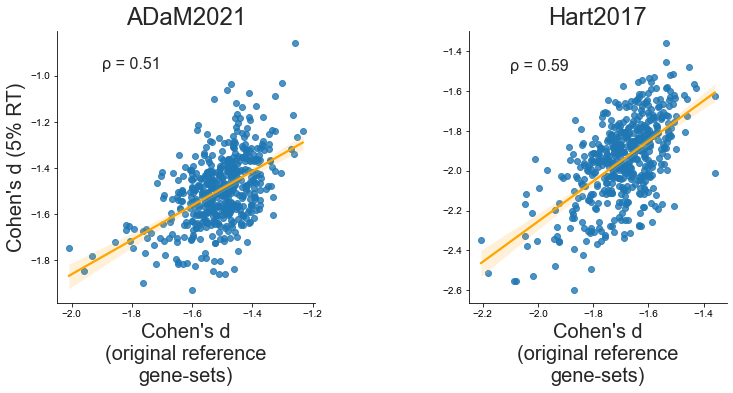

In [52]:
warnings.filterwarnings('ignore')

df1 = pd.read_csv(path + '/results/library-independent_RTs/QC_assessment/Cohen_d.tsv', sep='\t')
df2 = pd.read_csv(path + '/results/library-independent_RTs/QC_assessment/AUROC.tsv', sep='\t')
df3 = pd.read_csv(path + '/results/library-independent_RTs/QC_assessment/AUPRC.tsv', sep='\t')

corrs = df1.groupby(['gset', 'source'])[['Tot', '0.05']].corr()
corrs = corrs['Tot']
corrs = corrs[corrs < 1]
corrs = np.round(corrs, decimals=2)

df1_1 = copy.deepcopy(df1)
df1_1 = df1_1[df1_1['source'] == 'DEMETER2']

g = sns.FacetGrid(data = df1_1, col = 'gset', row = 'source', gridspec_kws={"wspace":0.6, "hspace":0.4},
            height = 5, aspect = 1.2, margin_titles=True, sharey=False, sharex=False)
g.map(sns.regplot, 'Tot', '0.05', scatter_kws={'clip_on': False}, color=sns.color_palette()[0],
    line_kws={"color": "orange"})
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)
g.axes[0,0].set_xlabel('Cohen\'s d\n(original reference\ngene-sets)', size=20)
g.axes[0,1].set_xlabel('Cohen\'s d\n(original reference\ngene-sets)', size=20)
g.axes[0,0].set_ylabel('Cohen\'s d (5% RT)', size=20)
g.axes[0,0].text(-1.9, -0.97,'ρ = ' + str(corrs[1]), fontsize=16)
g.axes[0,1].text(-2.1, -1.5,'ρ = ' + str(corrs[4]), fontsize=16)

for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False)

g.set_titles(col_template="{col_name}", row_template="", size=24)

Cohen's d scores computed on the training datasets using the whole reference gene-sets (x-axis) or the MinTEs 5% RTs (y-axis), with Pearson’s correlation coefficients:

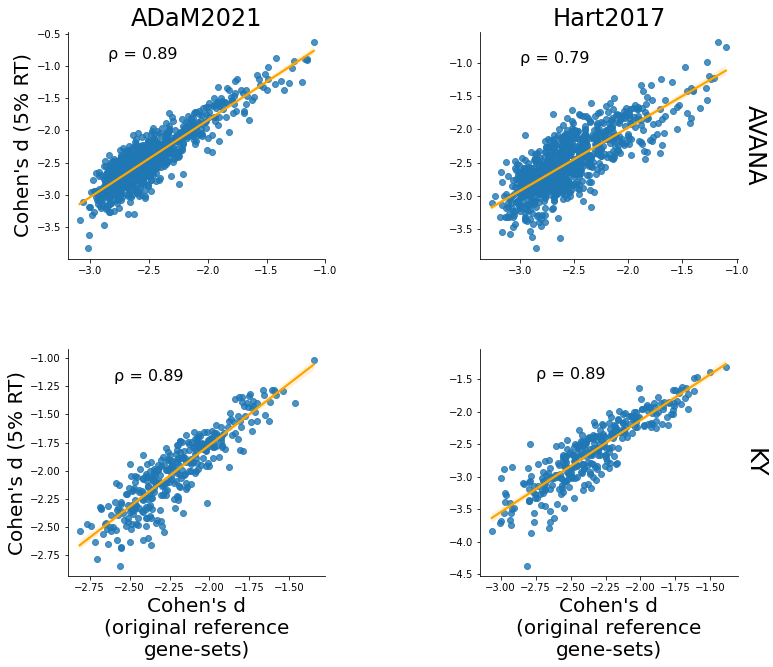

In [6]:
df1_2 = copy.deepcopy(df1)
df1_2 = df1_2[(df1_2['source'] == 'AVANA') | (df1_2['source'] == 'KY')]

g = sns.FacetGrid(data = df1_2, col = 'gset', row = 'source', gridspec_kws={"wspace":0.6, "hspace":0.4},
            height = 5, aspect = 1.2, margin_titles=True, sharey=False, sharex=False)
g.map(sns.regplot, 'Tot', '0.05', scatter_kws={'clip_on': False}, color=sns.color_palette()[0],
    line_kws={"color": "orange"})
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)
g.axes[1,0].set_xlabel('Cohen\'s d\n(original reference\ngene-sets)', size=20)
g.axes[1,1].set_xlabel('Cohen\'s d\n(original reference\ngene-sets)', size=20)
g.axes[0,0].set_ylabel('Cohen\'s d (5% RT)', size=20)
g.axes[1,0].set_ylabel('Cohen\'s d (5% RT)', size=20)
g.axes[0,0].text(-2.85, -0.9,'ρ = ' + str(corrs[0]), fontsize=16)
g.axes[0,1].text(-3, -1,'ρ = ' + str(corrs[3]), fontsize=16)
g.axes[1,0].text(-2.6, -1.2,'ρ = ' + str(corrs[2]), fontsize=16)
g.axes[1,1].text(-2.75, -1.5,'ρ = ' + str(corrs[5]), fontsize=16)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False)

Area Under the Receiver Operating Characteristic (AUROC) scores computed on the DEMETER dataset using the whole reference gene-sets (x-axis) or the MinTEs 5% RTs (y-axis), with Pearson’s correlation coefficients:

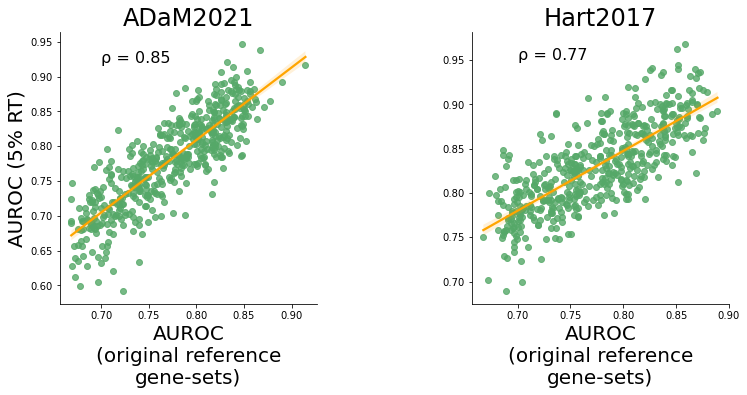

In [7]:
corrs = df2.groupby(['gset', 'source'])[['Tot', '0.05']].corr()
corrs = corrs['Tot']
corrs = corrs[corrs < 1]
corrs = np.round(corrs, decimals=2)

df2_1 = copy.deepcopy(df2)
df2_1 = df2_1[df2_1['source'] == 'DEMETER2']

g = sns.FacetGrid(data = df2_1, col = 'gset', row = 'source', gridspec_kws={"wspace":0.6, "hspace":0.4},
            height = 5, aspect = 1.2, margin_titles=True, sharey=False, sharex=False)
g.map(sns.regplot, 'Tot', '0.05', scatter_kws={'clip_on': False}, color=sns.color_palette('deep')[2],
    line_kws={"color": "orange"})
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)
g.axes[0,0].set_xlabel('AUROC\n(original reference\ngene-sets)', size=20)
g.axes[0,1].set_xlabel('AUROC\n(original reference\ngene-sets)', size=20)
g.axes[0,0].set_ylabel('AUROC (5% RT)', size=20)
g.axes[0,0].text(0.7, 0.92,'ρ = ' + str(corrs[1]), fontsize=16)
g.axes[0,1].text(0.7, 0.95,'ρ = ' + str(corrs[4]), fontsize=16)

for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False)

g.set_titles(col_template="{col_name}", row_template="", size=24)

AUROC scores computed on the training datasets using the whole reference gene-sets (x-axis) or the MinTEs 5% RTs (y-axis), with Pearson’s correlation coefficients:

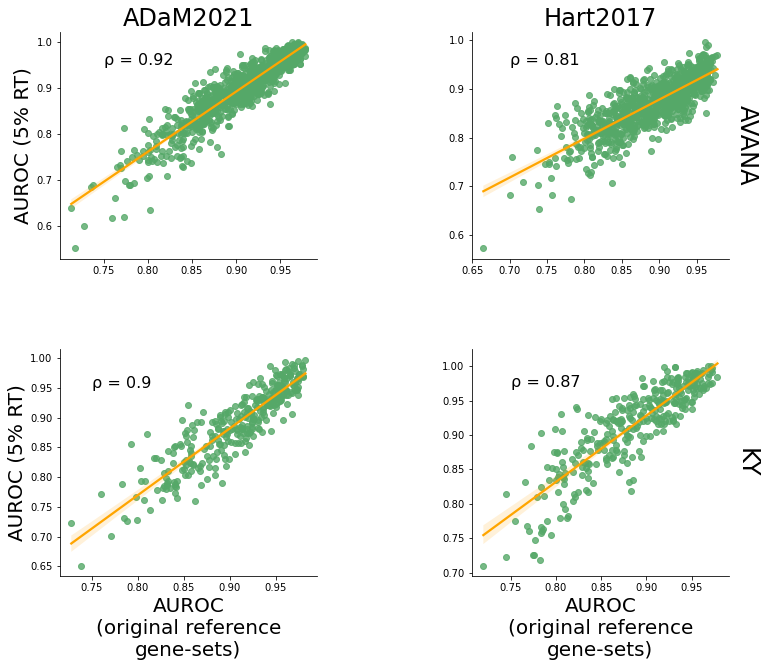

In [8]:
df2_2 = copy.deepcopy(df2)
df2_2 = df2_2[(df2_2['source'] == 'AVANA') | (df2_2['source'] == 'KY')]

g = sns.FacetGrid(data = df2_2, col = 'gset', row = 'source', gridspec_kws={"wspace":0.6, "hspace":0.4},
            height = 5, aspect = 1.2, margin_titles=True, sharey=False, sharex=False)
g.map(sns.regplot, 'Tot', '0.05', scatter_kws={'clip_on': False}, color=sns.color_palette('deep')[2],
    line_kws={"color": "orange"})
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)
g.axes[1,0].set_xlabel('AUROC\n(original reference\ngene-sets)', size=20)
g.axes[1,1].set_xlabel('AUROC\n(original reference\ngene-sets)', size=20)
g.axes[0,0].set_ylabel('AUROC (5% RT)', size=20)
g.axes[1,0].set_ylabel('AUROC (5% RT)', size=20)
g.axes[0,0].text(0.75, 0.95,'ρ = ' + str(corrs[0]), fontsize=16)
g.axes[0,1].text(0.7, 0.95,'ρ = ' + str(corrs[3]), fontsize=16)
g.axes[1,0].text(0.75, 0.95,'ρ = ' + str(corrs[2]), fontsize=16)
g.axes[1,1].text(0.75, 0.97,'ρ = ' + str(corrs[5]), fontsize=16)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False)

g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)

Area Under the Precision Recall Curve (AUPRC) scores computed on the DEMETER dataset using the whole reference gene-sets (x-axis) or the MinTEs 5% RTs (y-axis), with Pearson’s correlation coefficients:

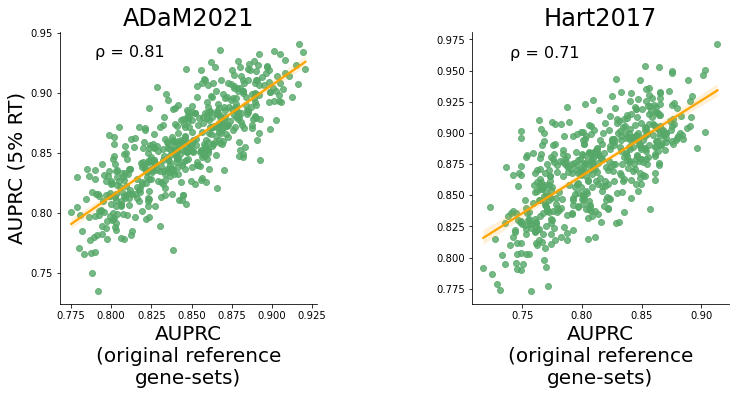

In [9]:
corrs = df3.groupby(['gset', 'source'])[['Tot', '0.05']].corr()
corrs = corrs['Tot']
corrs = corrs[corrs < 1]
corrs = np.round(corrs, decimals=2)

df3_1 = copy.deepcopy(df3)
df3_1 = df3_1[df3_1['source'] == 'DEMETER2']

g = sns.FacetGrid(data = df3_1, col = 'gset', row = 'source', gridspec_kws={"wspace":0.6, "hspace":0.4},
            height = 5, aspect = 1.2, margin_titles=True, sharey=False, sharex=False)
g.map(sns.regplot, 'Tot', '0.05', scatter_kws={'clip_on': False}, color=sns.color_palette('deep')[2],
    line_kws={"color": "orange"})
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)
g.axes[0,0].set_xlabel('AUPRC\n(original reference\ngene-sets)', size=20)
g.axes[0,1].set_xlabel('AUPRC\n(original reference\ngene-sets)', size=20)
g.axes[0,0].set_ylabel('AUPRC (5% RT)', size=20)
g.axes[0,0].text(0.79, 0.93,'ρ = ' + str(corrs[1]), fontsize=16)
g.axes[0,1].text(0.74, 0.96,'ρ = ' + str(corrs[4]), fontsize=16)

for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False)

g.set_titles(col_template="{col_name}", row_template="", size=24)

AUPRC scores computed on the training datasets using the whole reference gene-sets (x-axis) or the MinTEs 5% RTs (y-axis), with Pearson’s correlation coefficients:

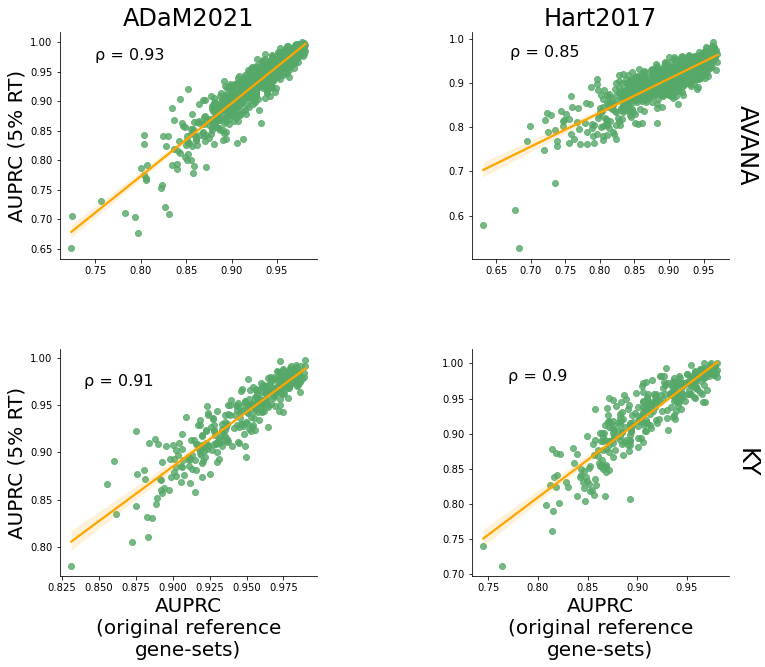

In [10]:
df3_2 = copy.deepcopy(df3)
df3_2 = df3_2[(df3_2['source'] == 'AVANA') | (df3_2['source'] == 'KY')]

g = sns.FacetGrid(data = df3_2, col = 'gset', row = 'source', gridspec_kws={"wspace":0.6, "hspace":0.4},
            height = 5, aspect = 1.2, margin_titles=True, sharey=False, sharex=False)
g.map(sns.regplot, 'Tot', '0.05', scatter_kws={'clip_on': False}, color=sns.color_palette('deep')[2],
    line_kws={"color": "orange"})
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)
g.axes[1,0].set_xlabel('AUPRC\n(original reference\ngene-sets)', size=20)
g.axes[1,1].set_xlabel('AUPRC\n(original reference\ngene-sets)', size=20)
g.axes[0,0].set_ylabel('AUPRC (5% RT)', size=20)
g.axes[1,0].set_ylabel('AUPRC (5% RT)', size=20)
g.axes[0,0].text(0.75, 0.97,'ρ = ' + str(corrs[0]), fontsize=16)
g.axes[0,1].text(0.67, 0.96,'ρ = ' + str(corrs[3]), fontsize=16)
g.axes[1,0].text(0.84, 0.97,'ρ = ' + str(corrs[2]), fontsize=16)
g.axes[1,1].text(0.77, 0.975,'ρ = ' + str(corrs[5]), fontsize=16)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False)

g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)

## Depletion fold-change scaling

Jaccard similarity scores between essential gene-sets called post scaling the DEMETER dataset with the whole reference gene-sets and the MinTEs 5% reduced templates (RTs), respectively:

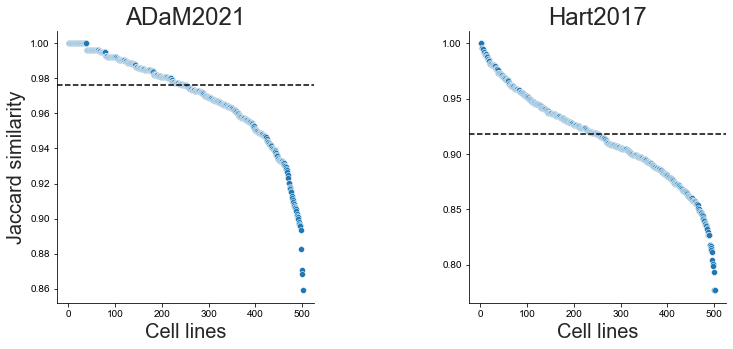

In [53]:
warnings.filterwarnings('ignore')

df1 = pd.read_csv(path + '/results/library-independent_RTs/data_scaling/positive_controls.tsv', sep='\t')
df2 = pd.read_csv(path + '/results/library-independent_RTs/data_scaling/genome-wide.tsv', sep='\t')

medians = df1.groupby(['gset', 'source']).median() 

df1_1 = copy.deepcopy(df1)
df1_1 = df1_1[df1_1['source'] == 'DEMETER2']

g = sns.FacetGrid(data = df1_1, col = 'gset', row = 'source', gridspec_kws={"wspace":0.6, "hspace":0.4},
            height = 5, aspect = 1.2, margin_titles=True, sharey=False, sharex=False)
g.map(sns.scatterplot, 'model_name', '0.05')
g.axes[0,0].set_xlabel('Cell lines', size=20)
g.axes[0,1].set_xlabel('Cell lines', size=20)
g.axes[0,0].set_ylabel('Jaccard similarity', size=20)
g.axes[0,0].axhline(medians['0.05'][1], color='black', linestyle='--') 
g.axes[0,1].axhline(medians['0.05'][4], color='black', linestyle='--')
g.set_titles(col_template="{col_name}", row_template="", size=24)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False)

Jaccard similarity scores between essential gene-sets called post scaling the training datasets with the whole reference gene-sets and the MinTEs 5% RTs, respectively:

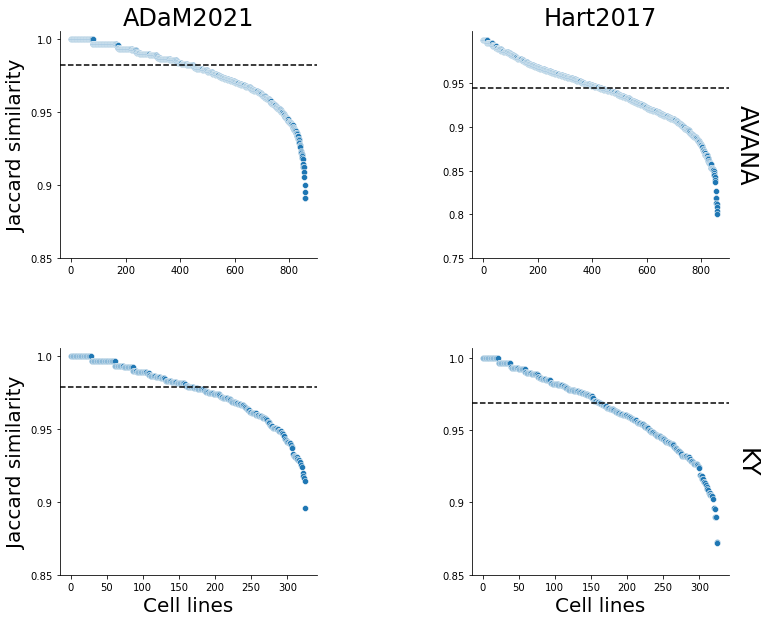

In [3]:
df1_2 = copy.deepcopy(df1)
df1_2 = df1_2[(df1_2['source'] == 'AVANA') | (df1_2['source'] == 'KY')]

g = sns.FacetGrid(data = df1_2, col = 'gset', row = 'source', gridspec_kws={"wspace":0.6, "hspace":0.4},
            height = 5, aspect = 1.2, margin_titles=True, sharey=False, sharex=False)
g.map(sns.scatterplot, 'model_name', '0.05')
g.axes[1,0].set_xlabel('Cell lines', size=20)
g.axes[1,1].set_xlabel('Cell lines', size=20)
g.axes[0,0].set_ylabel('Jaccard similarity', size=20)
g.axes[1,0].set_ylabel('Jaccard similarity', size=20)
g.axes[0,0].axhline(medians['0.05'][0], color='black', linestyle='--') 
g.axes[0,1].axhline(medians['0.05'][3], color='black', linestyle='--') 
g.axes[1,0].axhline(medians['0.05'][2], color='black', linestyle='--') 
g.axes[1,1].axhline(medians['0.05'][5], color='black', linestyle='--')
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False)

for i in range(2):
    for j in range(2):
        y_axis = g.axes[i,j].get_yticks()
        y_init = np.round(np.floor(y_axis[0]/0.05)*0.05, decimals=2)
        y_dist = np.arange(y_init, 1, 0.05)
        y_axis = np.round(y_dist, decimals=2)

        g.axes[i,j].set_yticks(y_axis)
        g.axes[i,j].set_yticklabels(y_axis)

g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)

Jaccard similarity scores between all of the fitness genes called post scaling the DEMETER and training datasets with the whole reference gene-sets and the MinTEs 5% RTs, respectively:

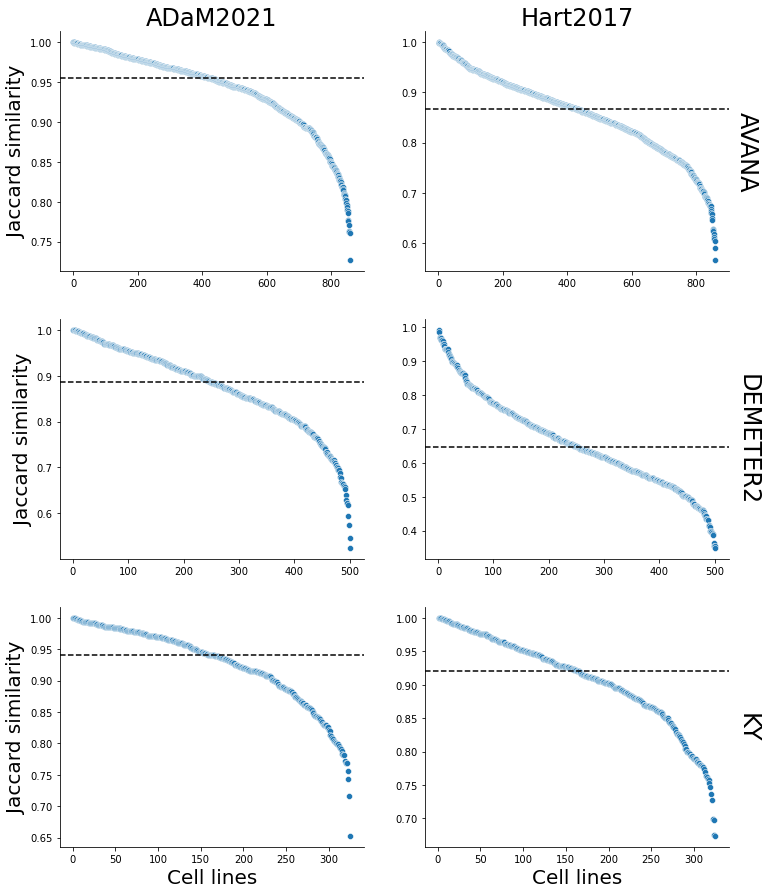

In [4]:
medians = df2.groupby(['gset', 'source']).median()

g = sns.FacetGrid(data = df2, col = 'gset', row = 'source', gridspec_kws={"wspace":0.2, "hspace":0.2},
            height = 5, aspect = 1.2, margin_titles=True, sharey=False, sharex=False)
g.map(sns.scatterplot, 'model_name', '0.05')
g.axes[0,0].set_ylabel('Jaccard similarity', size=20)
g.axes[1,0].set_ylabel('Jaccard similarity', size=20)
g.axes[2,0].set_ylabel('Jaccard similarity', size=20)
g.axes[2,0].set_xlabel('Cell lines', size=20)
g.axes[2,1].set_xlabel('Cell lines', size=20)
g.axes[0,0].axhline(medians['0.05'][0], color='black', linestyle='--') 
g.axes[0,1].axhline(medians['0.05'][3], color='black', linestyle='--') 
g.axes[1,0].axhline(medians['0.05'][1], color='black', linestyle='--') 
g.axes[1,1].axhline(medians['0.05'][4], color='black', linestyle='--')
g.axes[2,0].axhline(medians['0.05'][2], color='black', linestyle='--') 
g.axes[2,1].axhline(medians['0.05'][5], color='black', linestyle='--')
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False)

## MinTEs reduced templates preserve BAGEL performances 

Bland-Altman plots comparing BAGEL and MAGeCK performances in terms of ability to correctly classify essential and nonessential genes. The two methods are applied to the project Score cancer dependency dataset. Values on the y-axis indicate the difference in performance between BAGEL and MAGeCK when applied to an individual cell line screen. Values on the x-axis indicate the average of the two AUC values, thus the overall screen quality. Plots in the upper row are obtained using the original reference gene-sets as a template classifier for BAGEL, whereas plots in lower row are obtained using the MinTEs RTs of minimal size (5%):

[Text(0.86, 0, '0.86'),
 Text(0.89, 0, '0.89'),
 Text(0.92, 0, '0.92'),
 Text(0.95, 0, '0.95'),
 Text(0.98, 0, '0.98')]

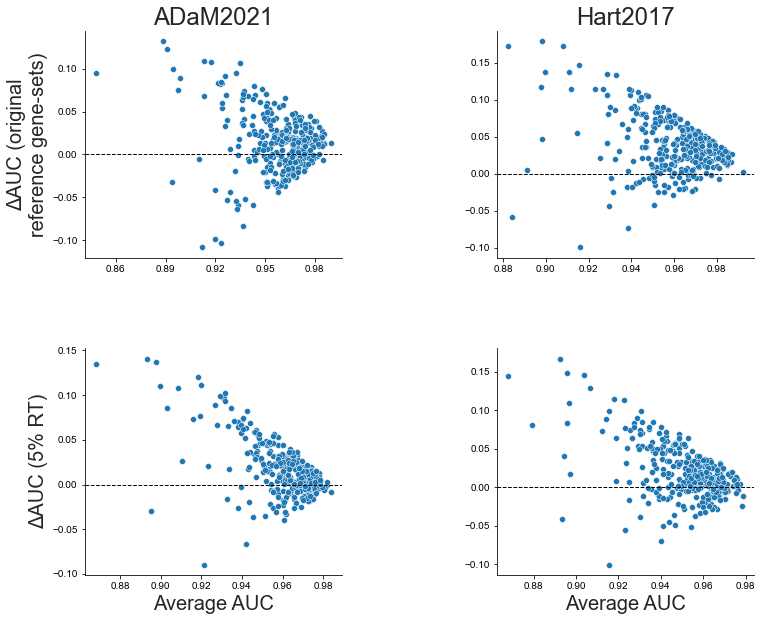

In [54]:
warnings.filterwarnings('ignore')

df = pd.read_csv(path + '/results/library-independent_RTs/BAGEL_vs_MAGeCK.tsv', sep='\t')

g = sns.FacetGrid(data = df, col = 'gset', row = 'perc', gridspec_kws={"wspace":0.6, "hspace":0.4},
    height = 5, aspect = 1.2, margin_titles = True, sharey=False, sharex=False)
g.map(sns.scatterplot, 'avg', 'diff')
g.axes[1,0].set_xlabel('Average AUC', size=20)
g.axes[1,1].set_xlabel('Average AUC', size=20)
g.axes[0,0].set_ylabel('ΔAUC (original\nreference gene-sets)', size=20)
g.axes[1,0].set_ylabel('ΔAUC (5% RT)', size=20)
g.set_titles(col_template="{col_name}", row_template="", size=24)

for ax in g.axes.flat:
    ax.axhline(0, ls='--', linewidth=1, color='black')
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False)

x_axis = g.axes[0,0].get_xticks()
x_init = np.round(x_axis[0], decimals=2)
x_dist = np.arange(x_init+0.02, 1, 0.03)
x_axis = np.round(x_dist, decimals=2)

g.axes[0,0].set_xticks(x_axis)
g.axes[0,0].set_xticklabels(x_axis)